In [23]:
import pandas as pd
import json
import os
from pandas import json_normalize
from typing import Tuple

json_file = "/Users/juliusmiers/KidneyExchangeOptimization/hyperparameter_tuning/results.json"
with open(json_file, "r") as file:
    data = json.load(file)

df = json_normalize(data, sep='_')
file_path =  os.path.dirname(json_file)
csv_file = os.path.join(file_path, 'results.csv')
df.to_csv(csv_file, index=False)

In [25]:
df_sorted = df.sort_values(by=['MaxCycleLength', 'MaxChainLength', 'TimeTaken'], ascending=[False, False, True])
group_count = df_sorted.groupby(['MaxCycleLength', 'MaxChainLength']).size().reset_index(name='count')
df_sorted = df_sorted.merge(group_count, on=['MaxCycleLength', 'MaxChainLength'], how='left')
df_sorted = df_sorted[['Instance', 'MaxCycleLength', 'MaxChainLength', 'TimeTaken', 'Status', 'count']]
df_sorted['optimal_percentage'] = df_sorted.apply(
    lambda row: (df_sorted[
        (df_sorted['MaxCycleLength'] == row['MaxCycleLength']) & 
        (df_sorted['MaxChainLength'] == row['MaxChainLength']) &
        (df_sorted['TimeTaken'] <= row['TimeTaken']) &
        (df_sorted['Status'] == 'Optimal')
    ].shape[0] / row['count']) * 100, axis=1
)


,Instance,MaxCycleLength,MaxChainLength,TimeTaken,Status,count,optimal_percentage
0,KP_Num13_N17_A1.txt,9.0,9.0,0.006903,Optimal,101.0,0.990099
1,KP_Num12_N17_A1.txt,9.0,9.0,0.007277,Optimal,101.0,1.980198
2,KP_Num20_N17_A1.txt,9.0,9.0,0.009238,Optimal,101.0,2.970297
3,KP_Num28_N18_A2.txt,9.0,9.0,0.011217,Optimal,101.0,3.960396
4,KP_Num14_N17_A1.txt,9.0,9.0,0.011598,Optimal,101.0,4.950495
...,...,...,...,...,...,...,...
5414,KP_Num149_N147_A19.txt,3.0,3.0,7.725200,Optimal,111.0,96.396396
5415,KP_Num123_N134_A6.txt,3.0,3.0,11.866800,Optimal,111.0,97.297297
5416,KP_Num143_N147_A19.txt,3.0,3.0,13.434300,Optimal,111.0,98.198198
5417,KP_Num148_N147_A19.txt,3.0,3.0,14.648500,Optimal,111.0,99.099099


/var/folders/k_/cffxxp4n0_dbf6_t9xw987wm0000gn/T/ipykernel_33756/3088350190.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


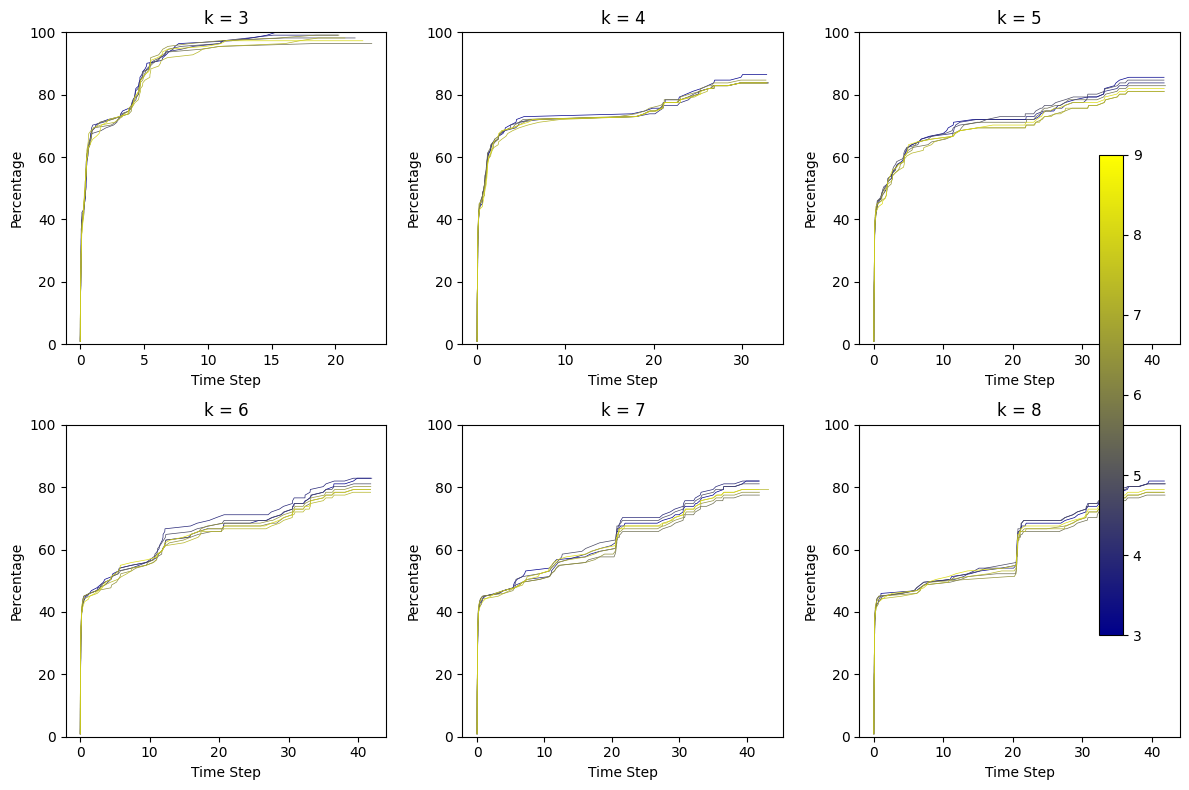

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Example data for demonstration
k_values = list(range(3,10))  
l_values = list(range(3,10)) 
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
cmap = mcolors.LinearSegmentedColormap.from_list('blue_to_yellow', ['darkblue', 'yellow'])
norm = mcolors.Normalize(vmin=3, vmax=9) 

for i, ax in enumerate(axs.flat): 
    k = k_values[i] 
    for j, l in enumerate(l_values):
        group = df_sorted.loc[(df_sorted['MaxCycleLength'] == k)&
                              (df_sorted['MaxChainLength'] == l)]
        ax.plot(group['TimeTaken'], group['optimal_percentage'], color=cmap(j / len(l_values)), linewidth=0.5)

    ax.set_title(f'k = {k}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    #ax.grid(True)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for the colorbar
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.05, pad=0.05)
cbar.ax.set_position([0.92, 0.1, 0.02, 0.8])


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()